<a href="https://colab.research.google.com/github/SamillyNunes/machine-learning-study/blob/main/naive_bayes_secao_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importacoes
import pandas as pd
from sklearn.model_selection import train_test_split # para dividir os dados entre treino e teste
from sklearn.naive_bayes import GaussianNB # para usar p NB
from sklearn.preprocessing import LabelEncoder # para fazer o label encoding
from sklearn.metrics import confusion_matrix, accuracy_score # para a matriz de confusao 
from yellowbrick.classifier import ConfusionMatrix # matriz de confusao de forma grafica

### Dados

In [ ]:
# os dados descrevem clientes de um banco alemao que pediram credito
credito = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/udemy/data-science/data-31/Credit.csv")
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
#separando os dados
atributos = credito.iloc[:,0:20].values # atributos previsores
classe = credito.iloc[:,20].values

In [ ]:
atributos

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

### Transformação dos atributos categóricos

In [ ]:
# Transformar os atributos pq nao podemos utilizar aqueles q nao sejam numericos
# observe que sao instanciados label encoders diferentes p cada um pq senao fizer, o numero
# atribuido a cada um podera ser diferente, oq deixara inconsistente

#	checking_status
labelEncoder1 = LabelEncoder()
atributos[:,0] = labelEncoder1.fit_transform(atributos[:,0])

# credit_history
labelencoder2 = LabelEncoder()
atributos[:,2] = labelencoder2.fit_transform(atributos[:,2])

#purpose
labelencoder3 = LabelEncoder()
atributos[:, 3] = labelencoder3.fit_transform(atributos[:, 3])

# saving_status
labelencoder4 = LabelEncoder()
atributos[:, 5] = labelencoder4.fit_transform(atributos[:, 5])

#employment
labelencoder5 = LabelEncoder()
atributos[:, 6] = labelencoder5.fit_transform(atributos[:, 6])

#personal_status
labelencoder6 = LabelEncoder()
atributos[:, 8] = labelencoder6.fit_transform(atributos[:, 8])

#other_parties
labelencoder7 = LabelEncoder()
atributos[:, 9] = labelencoder7.fit_transform(atributos[:, 9])

#property_magnitude
labelencoder8 = LabelEncoder()
atributos[:, 11] = labelencoder8.fit_transform(atributos[:, 11])

#other_payment_plans
labelencoder9 = LabelEncoder()
atributos[:, 13] = labelencoder9.fit_transform(atributos[:, 13])

#housing
labelencoder10 = LabelEncoder()
atributos[:, 14] = labelencoder10.fit_transform(atributos[:, 14])

#job
labelencoder11 = LabelEncoder()
atributos[:, 16] = labelencoder11.fit_transform(atributos[:, 16])

#own_telephone
labelencoder12 = LabelEncoder()
atributos[:, 18] = labelencoder12.fit_transform(atributos[:, 18])

#foreign_worker
labelencoder13 = LabelEncoder()
atributos[:, 19] = labelencoder13.fit_transform(atributos[:, 19])

### Divisao: teste e treino

In [ ]:
# test_size: 30% de registros serao destinados para o conjunto de teste
x_treinamento,x_teste,y_treinamento,y_teste = train_test_split(atributos,classe,test_size=0.3,random_state=0)

x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

### Modelo

In [ ]:
# Criando o modelo e passando os dados de treinamento
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento,y_treinamento) # criacao do modelo

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Previsoes com os dados de teste
previsoes = naive_bayes.predict(x_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

### Comparação: Matriz de confusão

In [ ]:
# relembrando a matriz de confusao: [[Verdadeiros Positivos, Falsos Pos.],[Falsos Negativos, Verdadeiros Neg.]]
confusao = confusion_matrix(y_teste,previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
taxa_acerto = accuracy_score(y_teste,previsoes)
taxa_erro = 1-taxa_acerto
taxa_acerto

0.71

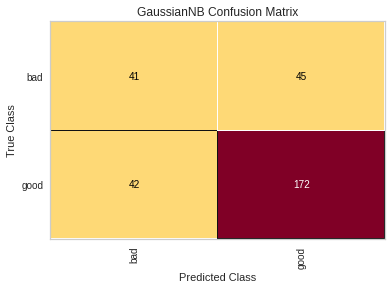

In [ ]:
#Visualização da matriz de confusao
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento,y_treinamento)
v.score(x_teste,y_teste)
v.poof()

### Previsões com Novo registro

In [ ]:
novo_credito = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/udemy/data-science/data-31/NovoCredit.csv")
novo_credito.shape
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [ ]:
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelEncoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

AttributeError: ignored